In [1]:
import rawpy
import numpy as np
from scipy.ndimage.filters import convolve

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams["figure.figsize"] = 10, 15

In [2]:
H_G = np.asarray(
    [[0, 1, 0],
    [1, 4, 1],
    [0, 1, 0]], dtype=np.float64 ) / 4

H_RB = np.asarray(
    [[1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]], dtype=np.float64) / 4

In [3]:
import glob

raws = []
rpyraws = []
for i in sorted(glob.glob("../../tmp/*.NEF"))[77:]:
    print(i)
    raw = rawpy.imread(i)
    rpyraws.append(raw)
    imcopy = raw.raw_image_visible.copy()
    pog = np.concatenate((
        convolve((imcopy*(raw.raw_colors_visible==0)), H_RB)[:,:,np.newaxis],
        convolve((imcopy*(raw.raw_colors_visible%2)), H_G)[:,:,np.newaxis],
        convolve((imcopy*(raw.raw_colors_visible==2)), H_RB)[:,:,np.newaxis],
    ), axis=2)
    
    raws.append(pog)
raws=np.asarray(raws)
raws

../../tmp/DSC_0078.NEF
../../tmp/DSC_0079.NEF
../../tmp/DSC_0080.NEF
../../tmp/DSC_0081.NEF
../../tmp/DSC_0082.NEF
../../tmp/DSC_0083.NEF
../../tmp/DSC_0084.NEF
../../tmp/DSC_0085.NEF
../../tmp/DSC_0086.NEF
../../tmp/DSC_0087.NEF
../../tmp/DSC_0088.NEF
../../tmp/DSC_0089.NEF
../../tmp/DSC_0090.NEF
../../tmp/DSC_0091.NEF
../../tmp/DSC_0092.NEF
../../tmp/DSC_0093.NEF
../../tmp/DSC_0094.NEF
../../tmp/DSC_0095.NEF
../../tmp/DSC_0096.NEF
../../tmp/DSC_0097.NEF
../../tmp/DSC_0098.NEF
../../tmp/DSC_0099.NEF
../../tmp/DSC_0100.NEF
../../tmp/DSC_0101.NEF
../../tmp/DSC_0102.NEF


array([[[[ 69,  31,  11],
         [ 48,  78,  23],
         [ 51,  45,  23],
         ...,
         [ 49,  77,  26],
         [ 52,  48,  26],
         [ 26,  97,  41]],

        [[ 45,  78,  23],
         [ 32,  61,  46],
         [ 34,  63,  47],
         ...,
         [ 33,  66,  52],
         [ 35,  67,  53],
         [ 17,  49,  82]],

        [[ 43,  42,  22],
         [ 31,  56,  44],
         [ 34,  61,  45],
         ...,
         [ 33,  66,  51],
         [ 36,  65,  51],
         [ 18,  83,  75]],

        ...,

        [[ 42,  63,  23],
         [ 28,  54,  46],
         [ 27,  53,  44],
         ...,
         [ 33,  63,  50],
         [ 33,  63,  50],
         [ 16,  47,  76]],

        [[ 43,  39,  22],
         [ 28,  50,  44],
         [ 27,  51,  44],
         ...,
         [ 32,  67,  49],
         [ 34,  64,  49],
         [ 17,  78,  75]],

        [[ 21,  87,  31],
         [ 14,  39,  63],
         [ 13,  61,  65],
         ...,
         [ 16,  49,  72],
        

In [4]:
rawsgamma = raws ** (1/2.4)
print("gammacc")

gammacc


In [11]:

pogawbb = np.percentile(rawsgamma[:,::10,::10], 99, (0, 1, 2))
pogawbw = np.percentile(rawsgamma[:,::10,::10], 10, (0, 1, 2))
print("wbcalc")
# pogawbb = np.percentile(raws, 1, (0, 1, 2))
# pogawbw = np.percentile(raws, 99, (0, 1, 2))

wbcalc


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.4113902469307638 -0.2955897476211841
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.3971853347295022 -0.30102706101636945
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.4113902469307638 -0.28465534303977175
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.4113902469307638 -0.2955897476211841
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.4113902469307638 -0.2901325743396504
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
1.3971853347295022 -0.33324458797850187
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for inte

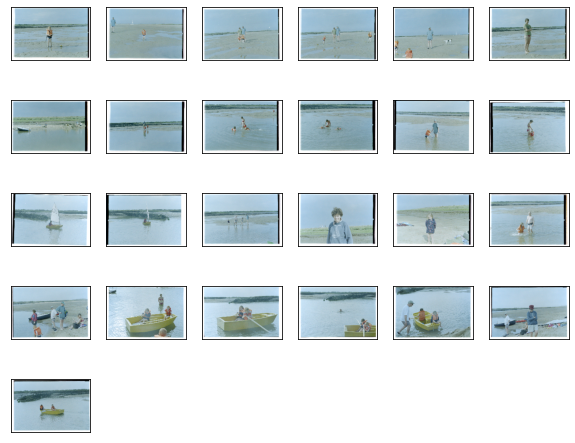

In [12]:
# plt.imshow(n[0][0].permute(1, 2, 0))
plt.figure(figsize=(10,10))
# pogawbb = np.percentile(raws, 1, (0, 1, 2))
# pogawbw = np.percentile(raws, 99, (0, 1, 2))
# print("wbs calc")
number = 36
offset = 0
outputs = []
for i in range(len(raws))[:number]:
    gridsize = number**0.5//1+(number**0.5%1>0)*1
    plt.subplot(gridsize, gridsize,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    pog = rawsgamma[i + offset] 
    
    # pogmed = np.median(pog, (0, 1))
    # print(i)
    toshow = (pog[::,::]-pogawbb)/(pogawbw-pogawbb)
    print(toshow.max(), toshow.min())
    outputs.append(toshow)
    plt.imshow(toshow[::30, ::30]*[1, 1, 1])
    # plt.xlabel(class_names[n[1][i]])

In [7]:
import imageio
# print(imageio.help("tiff"))
imageio.imwrite("test.jpg",(outputs[0].clip(0,1)*(2**8-1)).astype(np.uint8))


In [8]:
rawsgamma[5][1000:1005, 1000:1005,1]
# rpyraws[5].raw_colors_visible[1000:1005, 1000:1005]

array([[9.09415806, 9.15074983, 9.0751842 , 9.0751842 , 9.0751842 ],
       [9.03706892, 9.0751842 , 9.0751842 , 9.03706892, 8.99872724],
       [9.03706892, 9.03706892, 9.05615463, 9.03706892, 9.05615463],
       [8.92134983, 9.03706892, 9.11307667, 9.09415806, 9.03706892],
       [9.05615463, 9.0751842 , 9.15074983, 9.2254518 , 9.15074983]])

In [9]:
import matplotlib.colors
test = outputs[0].clip(0,1)#*(2**8-1)).astype(np.uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


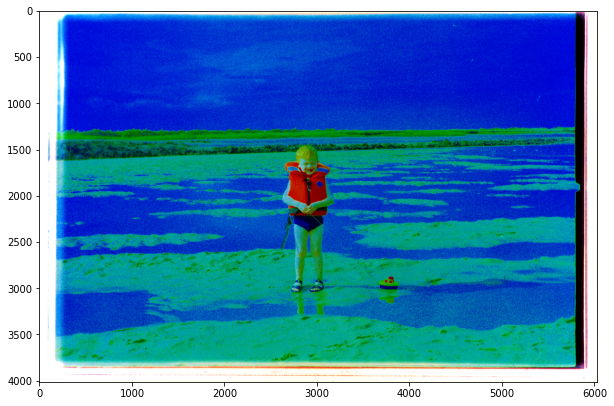

In [10]:
plt.imshow(matplotlib.colors.hsv_to_rgb(matplotlib.colors.rgb_to_hsv(test)*[1,10,1]))